# imports

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# imOpen

In [5]:
def imOpen(imageFileName):
    originalImage = Image.open(imageFileName)
    width = originalImage.size[0]
    height = originalImage.size[1]
    image = Image.new('L',(width,height))
    for i in range(0,width):
        for j in range(0,height):
            r,g,b = originalImage.getpixel((i,j))
            color=0.3*r+0.59*g+0.11*b
            image.putpixel((i,j),int(color))
        
    return image;

SyntaxError: invalid syntax (<ipython-input-5-329796096c47>, line 9)

In [ ]:
#test imOpen
image = imOpen("bars2.bmp")
plt.imshow(image,cmap="gray")

# toStrH

In [ ]:
def toStrH(image):
    width = image.size[0]
    height = image.size[1]
    lineBreak = "\n"
    code = "H "
    code += str(width)+" "+str(height)+lineBreak
    
  
    for j in range(0,height):
        currentValue = -1
        startOfValue = -1
        endOfValue = -1
        for i in range(0,width):
            color=image.getpixel((i,j))
        
            if(currentValue!=color):
                if(i!=0):
                    code += str(currentValue)+" "+str(startOfValue)+" "+str(i-1)+" "
                currentValue = color
                startOfValue=i
        code += str(currentValue)+" "+str(startOfValue)+" "+str(width-1)+" "        
        code += lineBreak
            
    return code

In [ ]:
#test
imageH = toStrH(image)   

# toStrV

In [ ]:
def toStrV(image):
    width = image.size[0]
    height = image.size[1]
    lineBreak = "\n"
    code = "V "
    code += str(width)+" "+str(height)+lineBreak
    
    for i in range(0,width):
        currentValue = -1
        startOfValue = -1
        endOfValue = -1
        for j in range(0,height):
            color=image.getpixel((i,j))
        
            if(currentValue!=color):
                if(j!=0):
                    code += str(currentValue)+" "+str(startOfValue)+" "+str(j-1)+" "
                currentValue = color
                startOfValue=j
        code += str(currentValue)+" "+str(startOfValue)+" "+str(height-1)+" "        
        code += lineBreak
            
    return code

In [ ]:
#test
image = imOpen("bars.bmp")
plt.imshow(image,cmap="gray")

In [ ]:
imageV=toStrV(image)

# toFile

In [ ]:
def toFile(fileName, runLengthCode):
    file = open(fileName,"w")
    file.writelines(runLengthCode)
    file.close()

In [ ]:
#test 
toFile("testwrite.txt", imageV)
toFile("test2write.txt", imageH)

# toImg

In [6]:
def toImg(fileName):
    file = open(fileName)
    fileText = file.read()
    file.close()
    fileTokens= fileText.split()
    runCodeDir = fileTokens[0]
    width = int(fileTokens[1])
    height = int(fileTokens[2])
    image = Image.new('L',(width,height))
    
    currentColorIndex=3
    currentStartIndex=4
    currentEndIndex=5
    currentColor = int(fileTokens[currentColorIndex])
    currentStart = int(fileTokens[currentStartIndex])
    currentEnd = int(fileTokens[currentEndIndex])
    
    outer=-1
    inner=-1
    if(runCodeDir=="V"):
        outer=width
        inner=height
    
    if(runCodeDir=="H"):
        outer=height
        inner=width
    
    for j in range(0,outer):
            current = 0
            while(current<inner):
                for k in range(currentStart, currentEnd+1):
                    if(runCodeDir=="V"):
                        image.putpixel((j,k),currentColor)
                    if(runCodeDir=="H"):
                        image.putpixel((k,j),currentColor)
                    
                    current+=1
                currentColorIndex+=3
                currentStartIndex+=3
                currentEndIndex+=3
                if(currentColorIndex<len(fileTokens)):
                    currentColor = int(fileTokens[currentColorIndex])
                    currentStart = int(fileTokens[currentStartIndex])
                    currentEnd = int(fileTokens[currentEndIndex])

    plt.imshow(image,cmap="gray")        
                

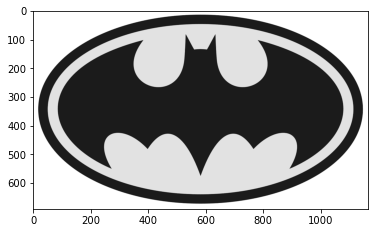

In [7]:
toImg("Mystery1.txt")

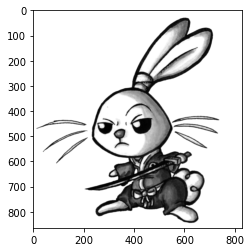

In [8]:
toImg("Mystery2.txt")

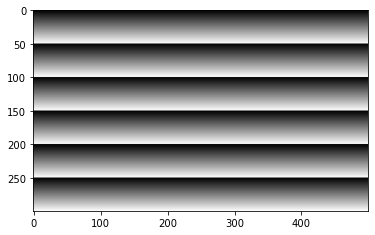

In [9]:
toImg("test2write.txt")

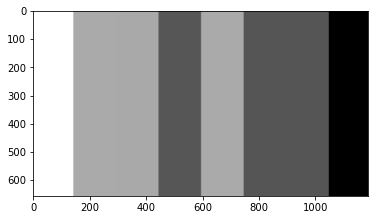

In [10]:
toImg("testwrite.txt")